In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import beta

## Q1

## Q2

## Q3

## Q4

In [2]:
df = pd.read_csv('/Users/anoopnath/Desktop/MSDS/DS6040/HW1/ArtHistBooks.csv')

df['Art'] = 0
df.loc[df.ArtBooks >=1, 'Art'] = 1 # making art column binary

#priors
alpha_flat= 1 #equal prob alpha
beta_flat = 1 #equal prob beta

alpha_low = 5 #low prob alpha
beta_low = 50 #low prob beta

### Part 1

Plot the distributions for the the following:

- p(hist)  <- probability of a history book being purchased   
- p(art)  <- probability of an art book being purchased   
- p(table)  <- probability of coffee table book being purchased   


In [3]:
k_hist= sum(df.HistoryBooks) #number of history book purchases
k_art = sum(df.Art)
k_table = sum(df.TableBooks)
n = len(df) #number of rows
x = np.linspace(0, 1, 1002)[1:-1] #x axix for plots

In [4]:
def createPlot(alpha_values, beta_values, typeOfBook):
    #function for plotting beta functions given a list of alphas and betas
    for a, b in zip(alpha_values, beta_values):
        dist = scipy.stats.beta(a, b)

        plt.plot(x, dist.pdf(x), 
                 label=r'$\alpha=%.0f,\ \beta=%.0f$' % (a, b))

    plt.xlabel('P(' +typeOfBook+')')
    #plt.ylabel(r'$p(x|\alpha,\beta)$')
    plt.ylabel('density')
    plt.title('Probability Density Function for ' +typeOfBook.title())

    plt.legend(['Prior--no info', 'posterior|no info prior',
                'prior--low prob','posterior|low prob prior', ])
    plt.show()

#### p(hist)

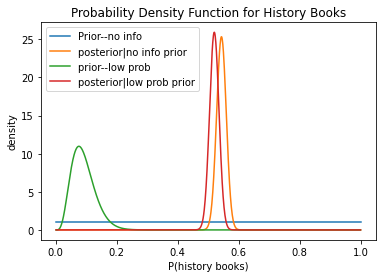

In [5]:

alpha_values_hist = [alpha_flat, alpha_flat+k_hist, alpha_low, alpha_low+k_hist ]
beta_values_hist = [beta_flat, beta_flat+n-k_hist,  beta_low, beta_low+n-k_hist ]
createPlot(alpha_values_hist, beta_values_hist, 'history books')

#### p(art)

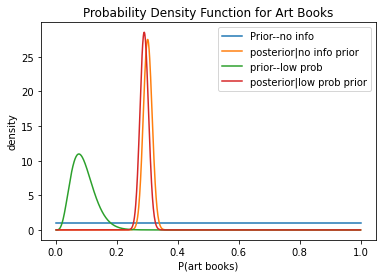

In [6]:
alpha_values_art = [alpha_flat, alpha_flat+k_art, alpha_low, alpha_low+k_art ]
beta_values_art = [beta_flat, beta_flat+n-k_art,  beta_low, beta_low+n-k_art ]
createPlot(alpha_values_art, beta_values_art, 'art books')

#### p(table)

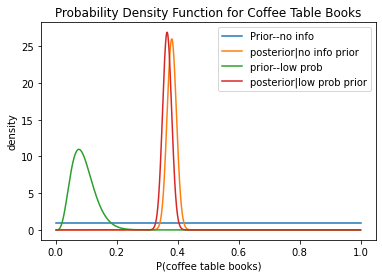

In [7]:
alpha_values_table = [alpha_flat, alpha_flat+k_table, alpha_low, alpha_low+k_table ]
beta_values_table = [beta_flat, beta_flat+n-k_table,  beta_low, beta_low+n-k_table ]
createPlot(alpha_values_table, beta_values_table, 'coffee table books')

## Part 2
Plot the distrubtions for the following conditional statements 
- p(new|art) <- probability of buying the new book given past purchase of art book
- p(new|hist)
- p(new|table)
- p(new|art & hist)
- p(new|art & table)
- p(new|table & hist)
- p(new|art & hist & table)

#### p(new|art)

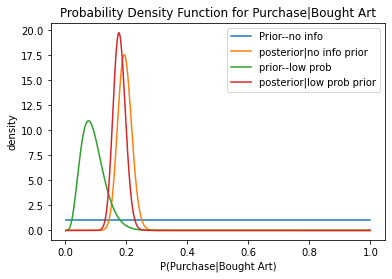

In [8]:
df_art= df.query("Art>0")
k_purchase_art= sum(df_art.Purchase)
n_purchase_art = len(df_art)

alpha_values_purchase_art = [alpha_flat, alpha_flat+k_purchase_art, alpha_low, alpha_low+k_purchase_art ]
beta_values_purchase_art = [beta_flat, beta_flat+n_purchase_art-k_purchase_art,  beta_low, beta_low+n_purchase_art-k_purchase_art ]
createPlot(alpha_values_purchase_art, beta_values_purchase_art, 'Purchase|Bought Art')

#### p(new|hist)

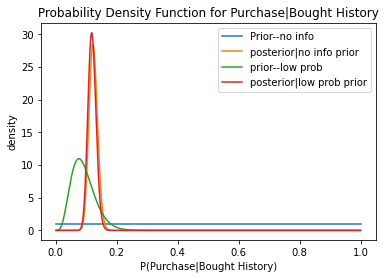

In [9]:
df_hist = df.query("HistoryBooks>0")
k_purchase_hist= sum(df_hist.Purchase)
n_purchase_hist = len(df_hist)

alpha_values_purchase_hist = [alpha_flat, alpha_flat+k_purchase_hist, alpha_low, alpha_low+k_purchase_hist ]
beta_values_purchase_hist = [beta_flat, beta_flat+n_purchase_hist-k_purchase_hist,  beta_low, beta_low+n_purchase_hist-k_purchase_hist ]
createPlot(alpha_values_purchase_hist, beta_values_purchase_hist, 'Purchase|Bought History')

#### p(new|table)

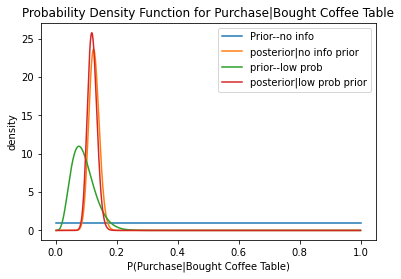

In [10]:
df_table = df.query("TableBooks>0")
k_purchase_table= sum(df_table.Purchase)
n_purchase_table = len(df_table)

alpha_values_purchase_table = [alpha_flat, alpha_flat+k_purchase_table, alpha_low, alpha_low+k_purchase_table ]
beta_values_purchase_table = [beta_flat, beta_flat+n_purchase_table-k_purchase_table,  beta_low, beta_low+n_purchase_table-k_purchase_table ]
createPlot(alpha_values_purchase_table, beta_values_purchase_table, 'Purchase|Bought Coffee Table')

#### p(new|art & hist)

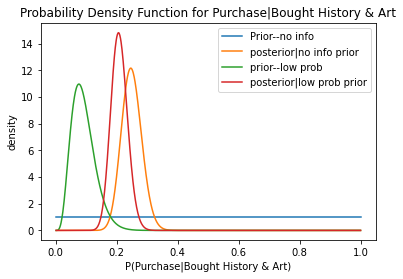

In [11]:
df_art_hist = df.query("Art>0").query("HistoryBooks>0")
k_purchase_art_hist= sum(df_art_hist.Purchase)
n_purchase_art_hist = len(df_art_hist)

alpha_values_purchase_art_hist = [alpha_flat, alpha_flat+k_purchase_art_hist, alpha_low, alpha_low+k_purchase_art_hist ]
beta_values_purchase_art_hist = [beta_flat, beta_flat+n_purchase_art_hist-k_purchase_art_hist,
                                 beta_low, beta_low+n_purchase_art_hist-k_purchase_art_hist ]
createPlot(alpha_values_purchase_art_hist, beta_values_purchase_art_hist, 'Purchase|Bought History & Art')

#### p(new|art & table)

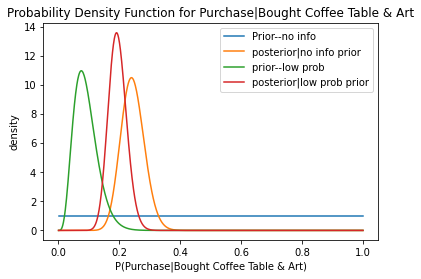

In [12]:
df_art_table = df.query("Art>0").query("TableBooks>0")
k_purchase_art_table= sum(df_art_table.Purchase)
n_purchase_art_table = len(df_art_table)

alpha_values_purchase_art_table = [alpha_flat, alpha_flat+k_purchase_art_table, alpha_low, alpha_low+k_purchase_art_table ]
beta_values_purchase_art_table = [beta_flat, beta_flat+n_purchase_art_table-k_purchase_art_table,
                                 beta_low, beta_low+n_purchase_art_table-k_purchase_art_table ]
createPlot(alpha_values_purchase_art_table, beta_values_purchase_art_table, 'Purchase|Bought Coffee Table & Art')

#### p(new|table & hist)

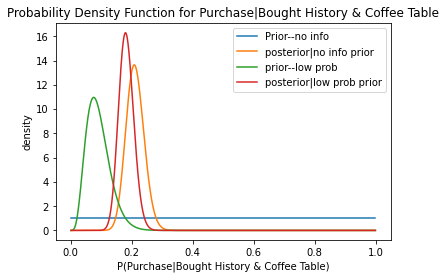

In [13]:
df_hist_table = df.query("HistoryBooks>0").query("TableBooks>0")
k_purchase_hist_table= sum(df_hist_table.Purchase)
n_purchase_hist_table = len(df_hist_table)

alpha_values_purchase_hist_table = [alpha_flat, alpha_flat+k_purchase_hist_table, alpha_low, alpha_low+k_purchase_hist_table ]
beta_values_purchase_hist_table = [beta_flat, beta_flat+n_purchase_hist_table-k_purchase_hist_table,
                                 beta_low, beta_low+n_purchase_hist_table-k_purchase_hist_table ]
createPlot(alpha_values_purchase_hist_table, beta_values_purchase_hist_table, 'Purchase|Bought History & Coffee Table')

#### p(new|art & hist & table)

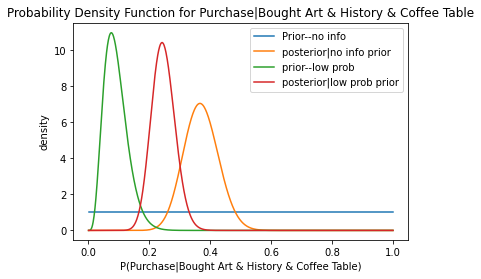

In [14]:
df_art_hist_table = df.query("HistoryBooks>0").query("TableBooks>0").query("Art>0")
k_purchase_art_hist_table= sum(df_art_hist_table.Purchase)
n_purchase_art_hist_table = len(df_art_hist_table)

alpha_values_purchase_art_hist_table = [alpha_flat, alpha_flat+k_purchase_art_hist_table, alpha_low, alpha_low+k_purchase_art_hist_table ]
beta_values_purchase_art_hist_table = [beta_flat, beta_flat+n_purchase_art_hist_table-k_purchase_art_hist_table,
                                 beta_low, beta_low+n_purchase_art_hist_table-k_purchase_art_hist_table ]
createPlot(alpha_values_purchase_art_hist_table, beta_values_purchase_art_hist_table, 'Purchase|Bought Art & History & Coffee Table')